In [1]:
import fastdup
import os
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_dir = "../BirdDataset/"
categories = ['train', 'valid', 'test']

In [3]:
def create_annotation(input_dir):
    data = {'filename': [], 'label': []}

    for category in categories[:3]:
        dir_path = os.path.join(input_dir, category)

        if os.path.exists(dir_path) and os.path.isdir(dir_path):
            for class_name in os.listdir(dir_path):
                class_dir = os.path.join(dir_path, class_name)
                if os.path.isdir(class_dir):
                    for image in os.listdir(class_dir):
                        image_path = os.path.join(class_dir, image)
                        data['filename'].append(image_path)
                        data['label'].append(class_name)

    return pd.DataFrame(data)

In [4]:
annotations = create_annotation(input_dir)
annotations

,filename,label
0,../BirdDataset/train/CREAM COLORED WOODPECKER/016.jpg,CREAM COLORED WOODPECKER
1,../BirdDataset/train/CREAM COLORED WOODPECKER/002.jpg,CREAM COLORED WOODPECKER
2,../BirdDataset/train/CREAM COLORED WOODPECKER/003.jpg,CREAM COLORED WOODPECKER
3,../BirdDataset/train/CREAM COLORED WOODPECKER/017.jpg,CREAM COLORED WOODPECKER
4,../BirdDataset/train/CREAM COLORED WOODPECKER/029.jpg,CREAM COLORED WOODPECKER
...,...,...
84374,../BirdDataset/test/GILA WOODPECKER/4.jpg,GILA WOODPECKER
84375,../BirdDataset/test/GILA WOODPECKER/5.jpg,GILA WOODPECKER
84376,../BirdDataset/test/GILA WOODPECKER/2.jpg,GILA WOODPECKER
84377,../BirdDataset/test/GILA WOODPECKER/3.jpg,GILA WOODPECKER


In [5]:
fd = fastdup.create(input_dir=input_dir)
fd.run(overwrite=True, annotations=annotations, ccthreshold=0.99)

fastdup By Visual Layer, Inc. 2024. All rights reserved.



fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "../BirdDataset"
Work directory is set to "work_dir"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



Creating visualization:  67%|██████▋   | 2/3 [03:40<02:08, 128.78s/it]

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done: 100%|██████████| 3/3 [05:07<00:00, 102.54s/it]                  


Analysis complete. Use the .explore() function to interactively explore your data on your local machine.

Alternatively, you can generate HTML-based galleries.
For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



0

In [6]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 84379 images
    Valid images are 100.00% (84,379) of the data, invalid are 0.00% (0) of the data
    Outliers: 6.27% (5,294) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 84379 images',
 'Valid images are 100.00% (84,379) of the data, invalid are 0.00% (0) of the data',
 'Outliers: 6.27% (5,294) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

In [7]:
connected_components = fd.connected_components()

In [8]:
print(connected_components)
print(type(connected_components))
component1, component2 = connected_components

(    index  component_id  count  mean_distance  min_distance  max_distance                                         filename               label error_code  is_valid  fd_index
0   60518         60518      4       0.991929      0.991929      0.991929     ../BirdDataset/train/CINNAMON ATTILA/021.jpg     CINNAMON ATTILA      VALID      True     60518
1   60529         60518      4       0.991929      0.991929      0.991929     ../BirdDataset/train/CINNAMON ATTILA/150.jpg     CINNAMON ATTILA      VALID      True     60529
2   62234         62233      4       0.991813      0.991813      0.991813  ../BirdDataset/train/ASIAN CRESTED IBIS/146.jpg  ASIAN CRESTED IBIS      VALID      True     62234
3   62235         62233      4       0.991813      0.991813      0.991813  ../BirdDataset/train/ASIAN CRESTED IBIS/152.jpg  ASIAN CRESTED IBIS      VALID      True     62235
4   66252         66250      4       0.990923      0.990923      0.990923            ../BirdDataset/train/BOBOLINK/140.jpg       

In [9]:
if isinstance(component1, pd.DataFrame):
    print(component1.info())
print("--------------------")
if isinstance(component2, pd.DataFrame):
    print(component2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          34 non-null     int64   
 1   component_id   34 non-null     int64   
 2   count          34 non-null     int64   
 3   mean_distance  34 non-null     float64 
 4   min_distance   34 non-null     float64 
 5   max_distance   34 non-null     float64 
 6   filename       34 non-null     object  
 7   label          34 non-null     category
 8   error_code     34 non-null     object  
 9   is_valid       34 non-null     bool    
 10  fd_index       34 non-null     int64   
dtypes: bool(1), category(1), float64(3), int64(4), object(2)
memory usage: 22.8+ KB
None
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   componen

Text(0, 0.5, 'Frequency')

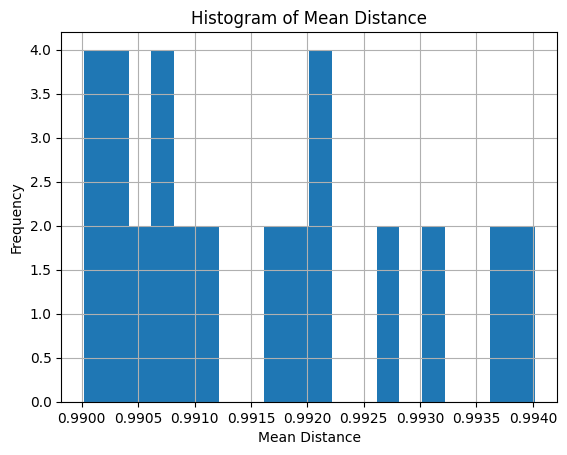

In [10]:
component1['mean_distance'].hist(bins=20)
plt.title('Histogram of Mean Distance')
plt.xlabel('Mean Distance')
plt.ylabel('Frequency')

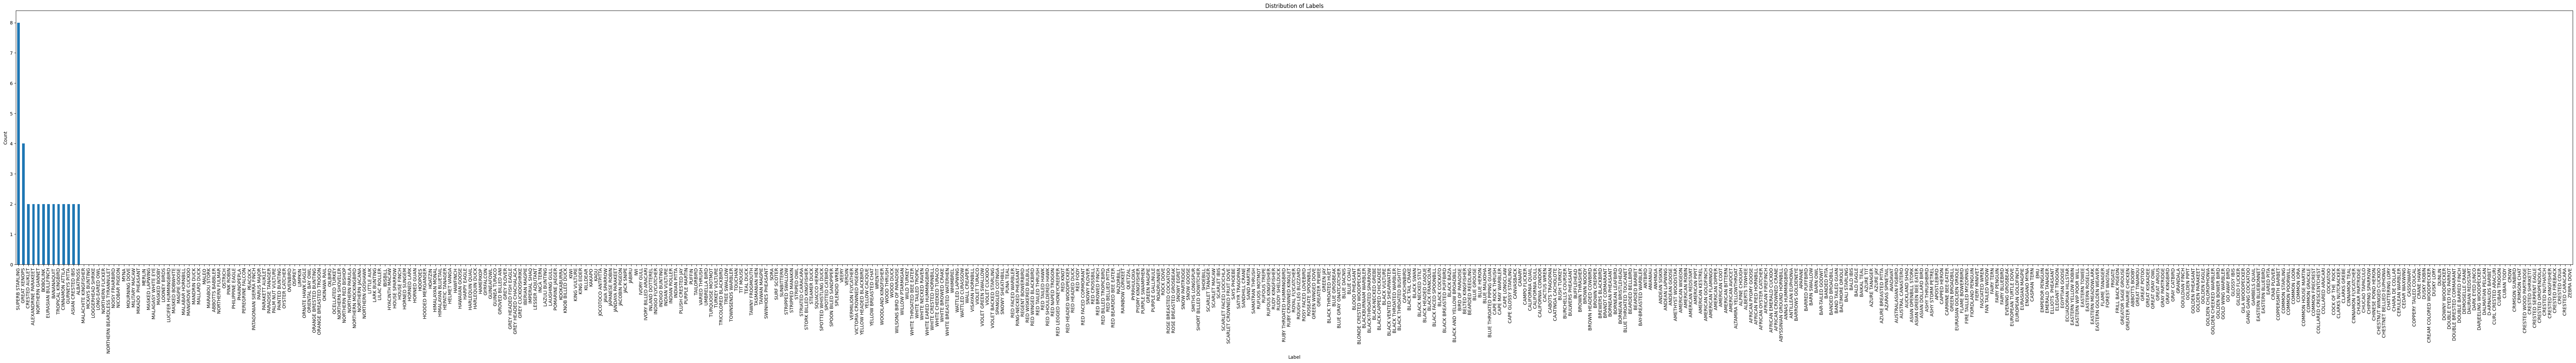

In [11]:
plt.figure(figsize=(100, 10))
component1['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

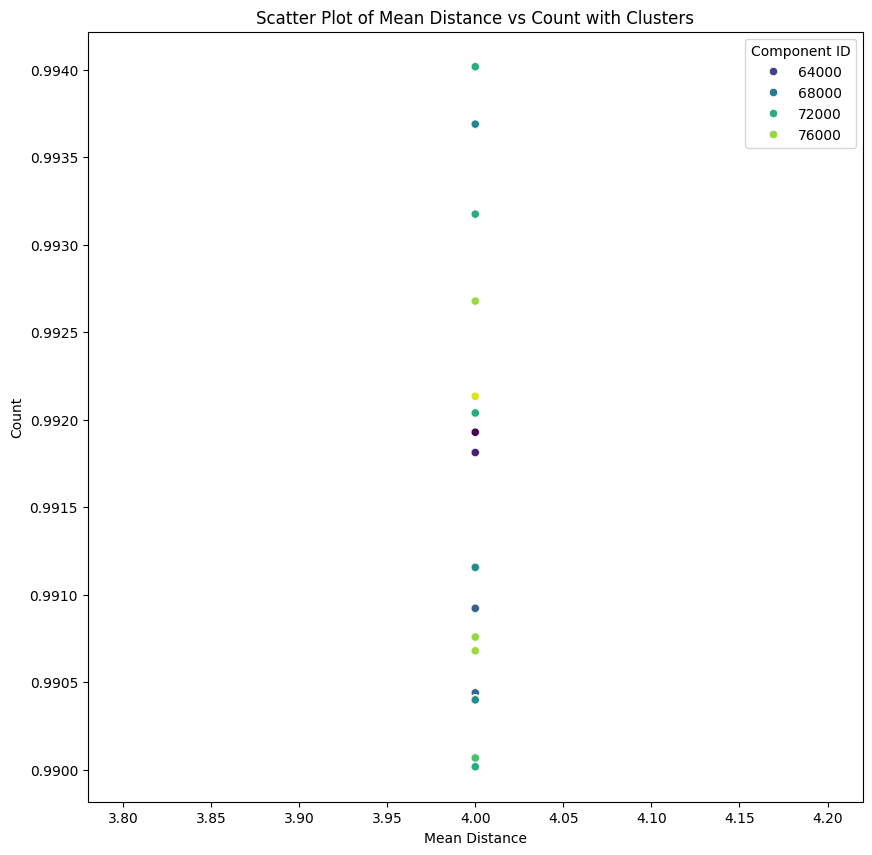

In [12]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=component1, x='count', y='mean_distance', hue='component_id', palette='viridis')
plt.title('Scatter Plot of Mean Distance vs Count with Clusters')
plt.xlabel('Mean Distance')
plt.ylabel('Count')
plt.legend(title='Component ID')
plt.show()

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
def load_process_imgs(image_path):
    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        return np.array(img).flatten()

In [15]:
image_paths = component1['filename'].tolist()
features = np.array([load_process_imgs(path) for path in image_paths])

In [16]:
kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(features)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

/Users/garifulla/macbook_python/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


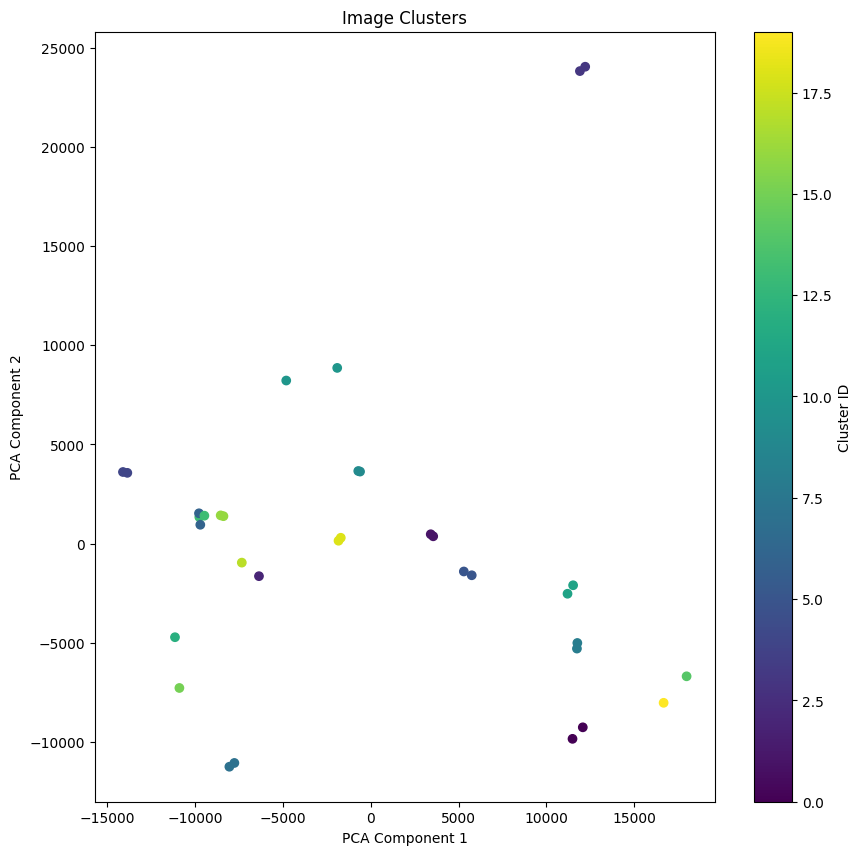

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Image Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster ID')
plt.show()

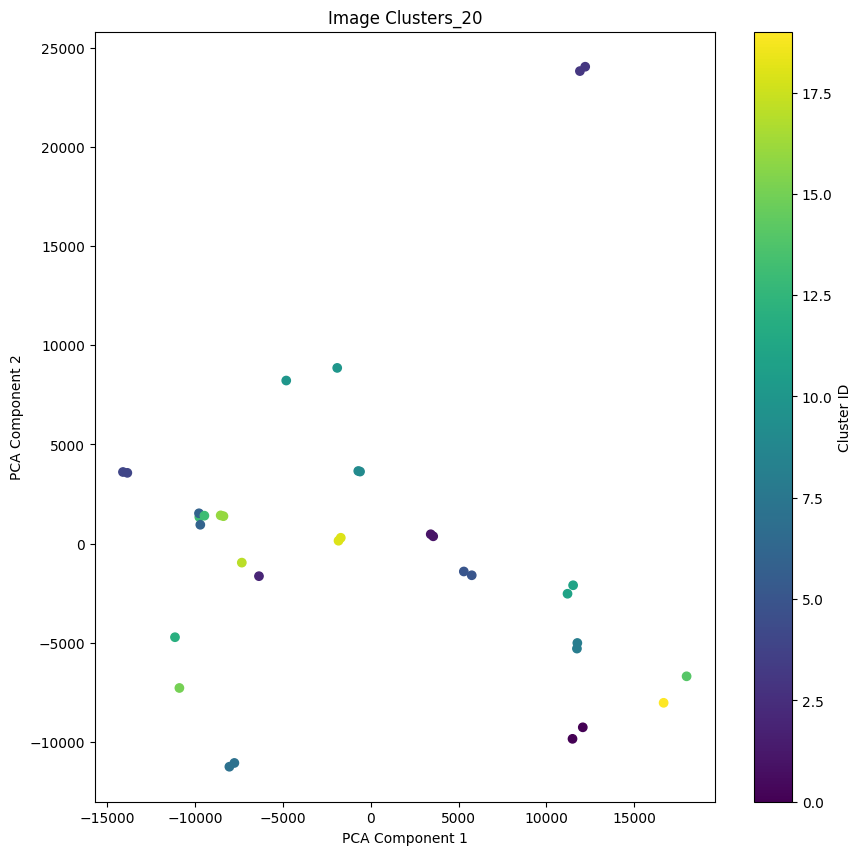

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Image Clusters_20')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster ID')
plt.show()

In [19]:
fd.invalid_instances()

,filename,label,index,error_code,is_valid,fd_index


In [20]:
fd.connected_components()

(    index  component_id  count  mean_distance  min_distance  max_distance                                         filename               label error_code  is_valid  fd_index
 0   60518         60518      4       0.991929      0.991929      0.991929     ../BirdDataset/train/CINNAMON ATTILA/021.jpg     CINNAMON ATTILA      VALID      True     60518
 1   60529         60518      4       0.991929      0.991929      0.991929     ../BirdDataset/train/CINNAMON ATTILA/150.jpg     CINNAMON ATTILA      VALID      True     60529
 2   62234         62233      4       0.991813      0.991813      0.991813  ../BirdDataset/train/ASIAN CRESTED IBIS/146.jpg  ASIAN CRESTED IBIS      VALID      True     62234
 3   62235         62233      4       0.991813      0.991813      0.991813  ../BirdDataset/train/ASIAN CRESTED IBIS/152.jpg  ASIAN CRESTED IBIS      VALID      True     62235
 4   66252         66250      4       0.990923      0.990923      0.990923            ../BirdDataset/train/BOBOLINK/140.jpg  

In [21]:
fd.outliers()

,outlier,nearest,distance,filename_outlier,label_outlier,index_x,error_code_outlier,is_valid_outlier,fd_index_outlier,filename_nearest,label_nearest,index_y,error_code_nearest,is_valid_nearest,fd_index_nearest
0,55822,57230,0.185353,../BirdDataset/train/LAUGHING GULL/204.jpg,LAUGHING GULL,55822,VALID,True,55822,../BirdDataset/train/LILAC ROLLER/059.jpg,LILAC ROLLER,57230,VALID,True,57230
1,45758,44813,0.234209,../BirdDataset/train/ZEBRA DOVE/168.jpg,ZEBRA DOVE,45758,VALID,True,45758,../BirdDataset/train/BROWN CREPPER/089.jpg,BROWN CREPPER,44813,VALID,True,44813
2,62524,1617,0.456663,../BirdDataset/train/LOONEY BIRDS/144.jpg,LOONEY BIRDS,62524,VALID,True,62524,../BirdDataset/train/IBERIAN MAGPIE/056.jpg,IBERIAN MAGPIE,1617,VALID,True,1617
3,62427,55182,0.472090,../BirdDataset/train/LOONEY BIRDS/066.jpg,LOONEY BIRDS,62427,VALID,True,62427,../BirdDataset/train/BLUE THROATED PIPING GUAN/122.jpg,BLUE THROATED PIPING GUAN,55182,VALID,True,55182
4,2735,66840,0.553471,../BirdDataset/train/CAPE MAY WARBLER/106.jpg,CAPE MAY WARBLER,2735,VALID,True,2735,../BirdDataset/train/ENGGANO MYNA/027.jpg,ENGGANO MYNA,66840,VALID,True,66840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,26561,79108,0.808914,../BirdDataset/train/YELLOW BREASTED CHAT/110.jpg,YELLOW BREASTED CHAT,26561,VALID,True,26561,../BirdDataset/train/EASTERN YELLOW ROBIN/204.jpg,EASTERN YELLOW ROBIN,79108,VALID,True,79108
5290,82953,34119,0.808919,../BirdDataset/test/RUDDY SHELDUCK/2.jpg,RUDDY SHELDUCK,82953,VALID,True,82953,../BirdDataset/train/RUDDY SHELDUCK/83.jpg,RUDDY SHELDUCK,34119,VALID,True,34119
5291,42736,42746,0.808919,../BirdDataset/train/AFRICAN CROWNED CRANE/049.jpg,AFRICAN CROWNED CRANE,42736,VALID,True,42736,../BirdDataset/train/AFRICAN CROWNED CRANE/102.jpg,AFRICAN CROWNED CRANE,42746,VALID,True,42746
5292,27888,50547,0.808920,../BirdDataset/train/CLARKS GREBE/076.jpg,CLARKS GREBE,27888,VALID,True,27888,../BirdDataset/train/JACOBIN PIGEON/180.jpg,JACOBIN PIGEON,50547,VALID,True,50547


In [22]:
import shutil
outlier_dir = '../BirdDatasetOutliers/'
splits = ['train', 'test', 'valid']
classes = component1["label"].tolist()
classes

['CINNAMON ATTILA',
 'CINNAMON ATTILA',
 'ASIAN CRESTED IBIS',
 'ASIAN CRESTED IBIS',
 'BOBOLINK',
 'EURASIAN BULLFINCH',
 'EURASIAN BULLFINCH',
 'NORTHERN GANNET',
 'CRESTED AUKLET',
 'ALBATROSS',
 'ALBATROSS',
 'SUPERB STARLING',
 'SUPERB STARLING',
 'SUPERB STARLING',
 'SUPERB STARLING',
 'SUPERB STARLING',
 'SUPERB STARLING',
 'SUPERB STARLING',
 'TROPICAL KINGBIRD',
 'TROPICAL KINGBIRD',
 'BANANAQUIT',
 'BANANAQUIT',
 'GREAT XENOPS',
 'GREAT XENOPS',
 'GURNEYS PITTA',
 'GURNEYS PITTA',
 'ALEXANDRINE PARAKEET',
 'ALEXANDRINE PARAKEET',
 'BOBOLINK',
 'SUPERB STARLING',
 'GREAT XENOPS',
 'GREAT XENOPS',
 'NORTHERN GANNET',
 'CRESTED AUKLET']

In [23]:
outliers_df = fd.outliers()
outliers_full_dir = outliers_df['filename_outlier'].tolist()
outliers = [os.path.basename(path) for path in outliers_full_dir]

In [24]:
def process_outliers(outlier):
    for split in splits:
        for class_name in classes:
            class_dir = os.path.join(input_dir, split, class_name)
            outlier_path = os.path.join(class_dir, outlier)

            if os.path.exists(outlier_path):
                # Create target directory if it doesn't exist
                target_dir = os.path.join(outlier_dir, split, class_name)
                os.makedirs(target_dir, exist_ok=True)

                # Move the file
                shutil.move(outlier_path, os.path.join(target_dir, outlier))
                print(f"Moved outlier {outlier} from {class_dir} to {target_dir}")
                break

In [25]:
for outlier in outliers:
    process_outliers(outlier)

print("Processing complete.")

Moved outlier 144.jpg from ../BirdDataset/train/CINNAMON ATTILA to ../BirdDatasetOutliers/train/CINNAMON ATTILA
Moved outlier 066.jpg from ../BirdDataset/train/CINNAMON ATTILA to ../BirdDatasetOutliers/train/CINNAMON ATTILA
Moved outlier 106.jpg from ../BirdDataset/train/CINNAMON ATTILA to ../BirdDatasetOutliers/train/CINNAMON ATTILA
Moved outlier 156.jpg from ../BirdDataset/train/CINNAMON ATTILA to ../BirdDatasetOutliers/train/CINNAMON ATTILA
Moved outlier 108.jpg from ../BirdDataset/train/CRESTED AUKLET to ../BirdDatasetOutliers/train/CRESTED AUKLET
Moved outlier 023.jpg from ../BirdDataset/train/CINNAMON ATTILA to ../BirdDatasetOutliers/train/CINNAMON ATTILA
Moved outlier 161.jpg from ../BirdDataset/train/EURASIAN BULLFINCH to ../BirdDatasetOutliers/train/EURASIAN BULLFINCH
Moved outlier 093.jpg from ../BirdDataset/train/CRESTED AUKLET to ../BirdDatasetOutliers/train/CRESTED AUKLET
Moved outlier 080.jpg from ../BirdDataset/train/CINNAMON ATTILA to ../BirdDatasetOutliers/train/CINNAM

In [26]:
fd.annotations()

,filename,label,index,error_code,is_valid,fd_index
0,../BirdDataset/train/CREAM COLORED WOODPECKER/016.jpg,CREAM COLORED WOODPECKER,0,VALID,True,0
1,../BirdDataset/train/CREAM COLORED WOODPECKER/002.jpg,CREAM COLORED WOODPECKER,1,VALID,True,1
2,../BirdDataset/train/CREAM COLORED WOODPECKER/003.jpg,CREAM COLORED WOODPECKER,2,VALID,True,2
3,../BirdDataset/train/CREAM COLORED WOODPECKER/017.jpg,CREAM COLORED WOODPECKER,3,VALID,True,3
4,../BirdDataset/train/CREAM COLORED WOODPECKER/029.jpg,CREAM COLORED WOODPECKER,4,VALID,True,4
...,...,...,...,...,...,...
84374,../BirdDataset/test/GILA WOODPECKER/4.jpg,GILA WOODPECKER,84374,VALID,True,84374
84375,../BirdDataset/test/GILA WOODPECKER/5.jpg,GILA WOODPECKER,84375,VALID,True,84375
84376,../BirdDataset/test/GILA WOODPECKER/2.jpg,GILA WOODPECKER,84376,VALID,True,84376
84377,../BirdDataset/test/GILA WOODPECKER/3.jpg,GILA WOODPECKER,84377,VALID,True,84377
